# TWICE Discography Analysis using Spotipy API and Python

Listening to TWICE's full discography on shuffle takes you on a rollercoaster ride. Their huge discography offers variety of subgenre under the pop-genre umbrella. Mixing their japanese tracks with korean and english tracks in a playlist felt like you are listening to different artists with how distinct they sound with one another.

This is a not so deep analysis on TWICE's full discography using spotify features. With this, we compare the numbers from all the title tracks versus the b-sides. The datasets used does NOT include any remixes, instrumentals, versions, and member solos. I decided to include all the OSTs (minus solo member OST) and subunit tracks from Formula Of Love album as it is in a 'TWICE' album.

***

## Spotify Audio Features:
•	<b>Acousticness </b> : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

•	<b>Danceability </b>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

•	<b>Energy </b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

•	<b>Instrumentalness</b>: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

•	<b>Liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

•	<b>Loudness</b>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

•	<b>Speechiness</b>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

•	<b>Valence</b>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

•	<b>Tempo</b>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


In [47]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
%matplotlib inline

In [48]:
#Load data: 
# -- All TWICE's tracks excluding versions, remixes, and instrumentals
df_alltracks = pd.read_csv('alltracks_updated.csv')
# -- all of TWICE's title tracks (Jpn, Kor, Eng)
df_title = pd.read_csv('title_tracks.csv')
# -- df_alltracks minus all the title tracks
df_bsides = pd.read_csv('bsides.csv')
df_alltracks.shape

(169, 18)

In [49]:
df_alltracks.head(5)

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,valence,key,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,SCIENTIST,Formula of Love: O+T=<3,TWICE,2021-11-12,194600,72,0.786,0.0487,0.858,0.649,11,0.0,0.1260,-3.740,0.0675,112.999,4
1,1,MOONLIGHT,Formula of Love: O+T=<3,TWICE,2021-11-12,219386,65,0.807,0.0245,0.704,0.961,5,0.0,0.0535,-5.496,0.0710,115.995,4
2,2,ICON,Formula of Love: O+T=<3,TWICE,2021-11-12,176160,63,0.746,0.0338,0.809,0.816,6,0.0,0.0756,-3.571,0.0484,149.984,4
3,3,CRUEL,Formula of Love: O+T=<3,TWICE,2021-11-12,211426,59,0.840,0.0112,0.827,0.820,9,0.0,0.1510,-2.958,0.0610,124.989,4
4,4,REAL YOU,Formula of Love: O+T=<3,TWICE,2021-11-12,187933,56,0.858,0.0977,0.831,0.886,9,0.0,0.0453,-3.029,0.1200,119.975,4


# Mean values of audio features

This section computes the mean values of audio features to see which feature majority of TWICE tracks falls into. For comparisons purposes on how much the overall discography deviate (or not) from the title tracks, the mean for title tracks was also computed.

In [50]:
df_mean=df_alltracks[['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness']].mean(skipna=False)
df_mean2=df_title[['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness']].mean(skipna=False)
df_mean4=df_bsides[['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness']].mean(skipna=False)

<b>time signature: </b> Most pop songs run on 4 time signature. Within TWICE's discography, there were only three songs that is outside this. Thus in this analysis, time signature is discarded.

<b>Instrumentalness:</b> All instrumental tracks were not included in the playlist. Thus, this parameter is also discarded from the analysis

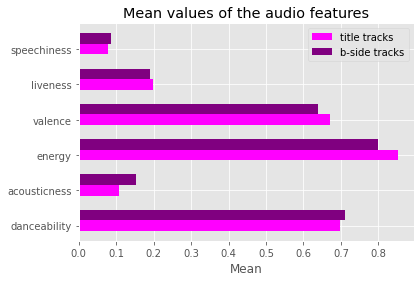

In [51]:
# CREATING THE PLOT FOR FEATURES
# number of features
N = len(df_mean)
i = np.arange(N)
width = 0.3

# bar plot
plt.barh(i, df_mean2, width, label='title tracks', color='magenta')
plt.barh(i+width, df_mean4, width, label='b-side tracks', color='purple')

# plot aesthetics
plt.xlabel('Mean', fontsize = 12)
plt.title('Mean values of the audio features')
plt.yticks(i, ['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness'])
plt.rcParams['figure.figsize'] =(8,3)
plt.legend(loc='best')
style.use("ggplot")

plt.show()

Audio features are compared with the mean values of all the title tracks versus only the bsides. The bar graph above shows how that title tracks generally have higher energy and valence. It is interesting to see that even if they have ballads in every album, the overall danceability of the bsides surpassed the average on title tracks. This could be attributed to the wide variety of genre they have released as title tracks.

As TWICE is known to be a bringer of positivity, it is not surprising to see the a high score on danceability, energy, and valence.

In [53]:
df_title["release_date"] = pd.to_datetime(df_title["release_date"])
tt_sorted = df_title.sort_values(by='release_date', ascending = True)

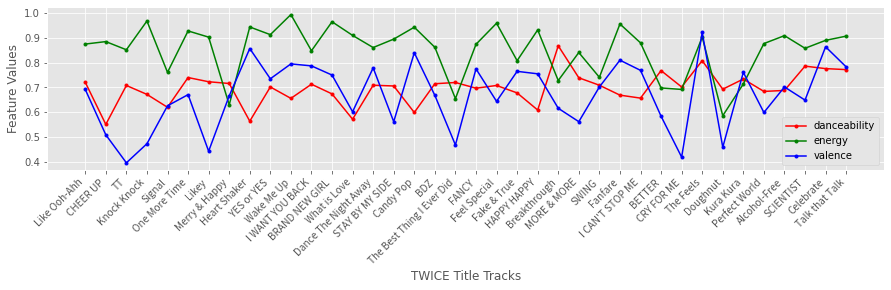

In [54]:
fprop = fm.FontProperties(fname='NotoSansCJKtc-Regular.otf')
plt.rcParams['figure.figsize'] = [15, 3]
plt.xticks(fontproperties=fprop, rotation=45, ha='right')
plt.xlabel("TWICE Title Tracks")
plt.ylabel("Feature Values")

# movement of audio features from track to track
plt.plot('name', 'danceability', data=tt_sorted, marker='.', label='danceability',color='red')
plt.plot('name', 'energy', data=tt_sorted, marker='.', label='energy', color='green')
plt.plot('name', 'valence', data=tt_sorted, marker='.', label= 'valence', color='blue')
plt.legend(framealpha=1, frameon=True, loc='lower right')

TWICE title tracks as shown has high energy on average (as expected) for both the japanese and korean releases. Then, we can compare if the overall discography diverts away from the theme of the title tracks. (Ooohh! now i'm tempted to see how it goes per album...)

As indicated by valence, their title track moods vary a lot especially with the japanese titles mixed in. Who would've thought peak TWICEs bubble-gum era has greater algorithmic sadness than their current releases. Cheer-up, Knock-Knock, TT and Likey barely reach the 0.5 mark! However, the real depth of the song is the combination of the lyrics and the sound... we'll get to it some other time. For now, let's get fascinated on the diversity of sound that TWICE discography offers.

The way the graph moves inconsistently on peaks and troughs every release shows how unpredictable their next sound would be.

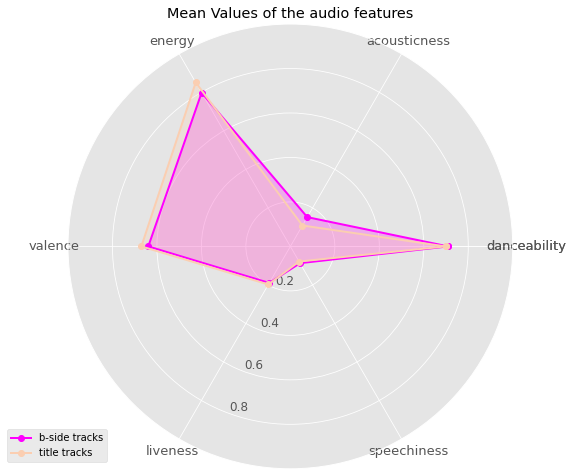

In [55]:
labels= ['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness']
stats= df_mean4.tolist()
stats2 = df_mean2.tolist()


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2=np.concatenate((stats2,[stats2[0]]))
angles=np.concatenate((angles,[angles[0]]))
labels=np.concatenate((labels,[labels[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label="b-side tracks", color= '#FF00FF')
ax.fill(angles, stats, alpha=0.25, facecolor='#FF00FF')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)

ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], size=12)
plt.ylim(0,1)

# plot title track features
ax.plot(angles, stats2, 'o-', linewidth=2, label = "title tracks", color = '#FBCEB1')
ax.fill(angles, stats2, alpha=0.25, facecolor='#FBCEB1' )


ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

As expected of TWICE. Most TWICE songs are danceable, high pitched, and happy sounding. Mood boosters. The overall mood of TWICE's discography in shuffle will get you up and dancing on your feet. Now we can take a look at the tempo.

# Tempo

Tempo determine's the overall mood of a song. It refers to the speed at which music is being played. A song compsosition differs in tempo throughout the whole song, spotify gave an overall estimated tempo of a track.

Out of 30+ title tracks, 9 of them have tempo higher than 150. That's 1/3 of all their promoted releases. And those tracks are from 2016-2020, majority being 2016-2018 - the peak TWICE cute era. Generally, the tempo correlates with the mood of the song. Faster songs are joyful, and the slower songs are sadder, dramatic... romantic.

According to Musiio Blog, the most popular tempo range on Spotify top 200 songs falls within 90-99BPM, followed by 80-89BPM. However, the most streamed songs falls within 140-149BPM with 144BPM songs were streamed the most. Now let's see which TWICE tracks fall under this category.

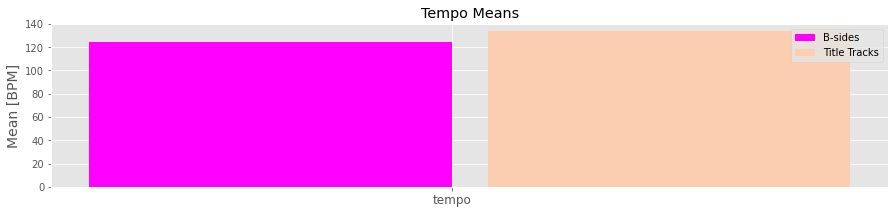

In [56]:
tempo_all = df_bsides[['tempo']]
tempo_title = df_title[['tempo']]

N = len(tempo_all.mean(skipna=False))
ind = np.arange(N)
width=0.5

plt.bar(ind, tempo_all.mean() , width, label='B-sides', color = '#FF00FF')
plt.bar(ind + 1.1*width, tempo_title.mean(), width, label='Title Tracks', color = '#FBCEB1')

plt.ylabel('Mean [BPM]', fontsize = 14)
plt.title('Tempo Means')

plt.xticks(ind + width / 2, (list(tempo_title)[:]), fontsize = 12)
plt.legend(loc='best')
style.use("ggplot")

On the average, TWICE tracks falls out of the typical tempos for most streamed tracks . It is also beyond the most popular tempo for songs. This makes light on why the general public takes long to open-up to their songs. Tempo wise, it isn't for the public. (Makes me happy I belong to the minority)

Source: https://blog.musiio.com/2021/08/19/which-musical-tempos-are-people-streaming-the-most/#:~:text=90%2D99%20BPM%20is%20the%20most%20popular%20tempo%20range

In [57]:
a = df_title.loc[df_title['tempo'] >= 140.0]
b = a.loc[a['tempo'] < 150.0]
print(b[['name', 'tempo']])

            name    tempo
0   Like Ooh-Ahh  141.994
29    CRY FOR ME  144.896


Oh wow! Would you look at that. Cry for me is undeniably one of the most loved TWICE song, fans and non-fans alike. As tracks under the 140-149BM range isn't the same, it was also found that HIP-HOP genre dominates songs within this range. So generally, hiphop garners more streams as it is the song of the public.

Electronic music, specifically those under the pop genre comprised the list for the least streamed tempo range: 120-129BPM.

In [58]:
a = df_title.loc[df_title['tempo'] >= 120.0]
b = a.loc[a['tempo'] < 130.0]
print(b[['name', 'tempo', 'album']])

               name    tempo                 album
2                TT  129.946  Twicecoaster: Lane 1
3       Knock Knock  129.971  Twicecoaster: Lane 2
5     One More Time  129.955         One More Time
12       Wake Me Up  125.979            Wake Me Up
16  STAY BY MY SIDE  123.043       STAY BY MY SIDE
22     Feel Special  128.981          Feel Special
23      Fake & True  125.938           Fake & True
24            SWING  120.002    &TWICE (Repackage)
28           BETTER  124.990                BETTER
33        The Feels  120.044             The Feels


Interestingly, fan-favorites title tracks fall under the least streamed tempo range. (TT, KnockKnock, Feel Special, Fake & True, The Feels) 

In [60]:
a = df_bsides.loc[df_bsides['tempo'] >= 140.0]
b = a.loc[a['tempo'] < 150.0]
print(b[['name', 'tempo', 'album']])

                    name    tempo                    album
1                   ICON  149.984  Formula of Love: O+T=<3
5             LAST WALTZ  141.968  Formula of Love: O+T=<3
72             Be as ONE  142.003          BDZ (Repackage)
75   Shot Thru The Heart  142.965            Summer Nights
89             Ding Dong  149.995            Merry & Happy
126      Queen of Hearts  149.940              BETWEEN 1&2


It also makes sense why some of their popular b-sides fall under the 140-149BPM range whereas majority of the underrated tracks below belongs to the least streamed tempo 120-129BPM.

In [61]:
a = df_bsides.loc[df_bsides['tempo'] >= 120.0]
b = a.loc[a['tempo'] < 130.0]
print(b[['name', 'tempo', 'album']])

                                  name    tempo                    album
2                                CRUEL  124.989  Formula of Love: O+T=<3
9    PUSH & PULL (JIHYO, SANA, DAHYUN)  120.069  Formula of Love: O+T=<3
24                                 SOS  120.041            Taste of Love
29                     DO WHAT WE LIKE  124.926           Eyes Wide Open
39                              OXYGEN  129.956              MORE & MORE
45                            Stronger  127.041       &TWICE (Repackage)
46                           Changing!  120.038       &TWICE (Repackage)
53                            GET LOUD  120.004             Feel Special
54                            TRICK IT  127.983             Feel Special
67                     STAY BY MY SIDE  123.043          BDZ (Repackage)
68                             L.O.V.E  125.005          BDZ (Repackage)
70                        Say it again  129.985          BDZ (Repackage)
71                          Wake Me Up  125.979    

Below are the tracks that falls under the most popular song tempo. It is a combination of loud and soft songs. I believe these songs also belong to the fanfavorites lists on surveys.

In [66]:
a = df_alltracks.loc[df_alltracks['tempo'] >= 90.0]
b = a.loc[a['tempo'] < 100.0]
print(b[['name', 'tempo']])

                            name   tempo
7                       ESPRESSO  93.208
18                  Good at Love  91.021
26   I love you more than anyone  98.166
27                  Alcohol-Free  97.097
44                    SHOT CLOCK  97.995
75                 GIRLS LIKE US  97.993
114                       Turtle  95.079
122                    Love Line  95.004
129                Hold Me Tight  98.999
131              Someone Like Me  99.993
139                    Next Page  93.019


# Standard Deviation of Audio Features

The standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the expected value of the set, while a high standard deviation indicates that the values are spread out over a wider range.

Audio features suggests the mood and genre of a song. The standard deviation of a feature can suggest variety on mood and genre of the whole discography. If the deviation is high, the discography is more diverse.

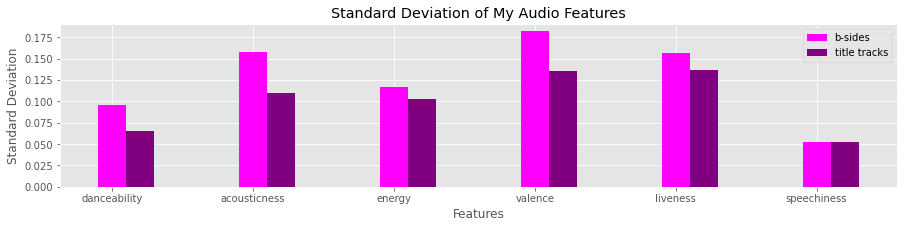

In [72]:
af_title = df_title[['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness']].std()
af_bsides = df_bsides[['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness']].std()
af_alltracks = df_alltracks[['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness']].std()

width = 0.2
plt.bar(i, af_bsides, width, label='b-sides', color='magenta')
plt.bar(i+width, af_title, width, label='title tracks', color='purple')
plt.xticks(i, ['danceability', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness'])
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.title("Standard Deviation of My Audio Features")
plt.legend(loc='best')

In [74]:
mean_bsides = af_bsides.mean()
mean_title = af_title.mean()
mean_all = af_alltracks.mean()

print(f'bsides: {mean_bsides} \ttitle: {mean_title} \tall tracks: {mean_all}')

bsides: 0.12690116483353656 	title: 0.10050946431384239 	all tracks: 0.12233641076872044


Not as much as I hoped as but bsides has more variation than the title tracks as expected. The average deviation is also slightly higher than the title tracks. It makes sense as TWICE tend to play a lot more with sounds on bsides. The mean deviation also did not change much with all tracks together.

# Correlation between variables

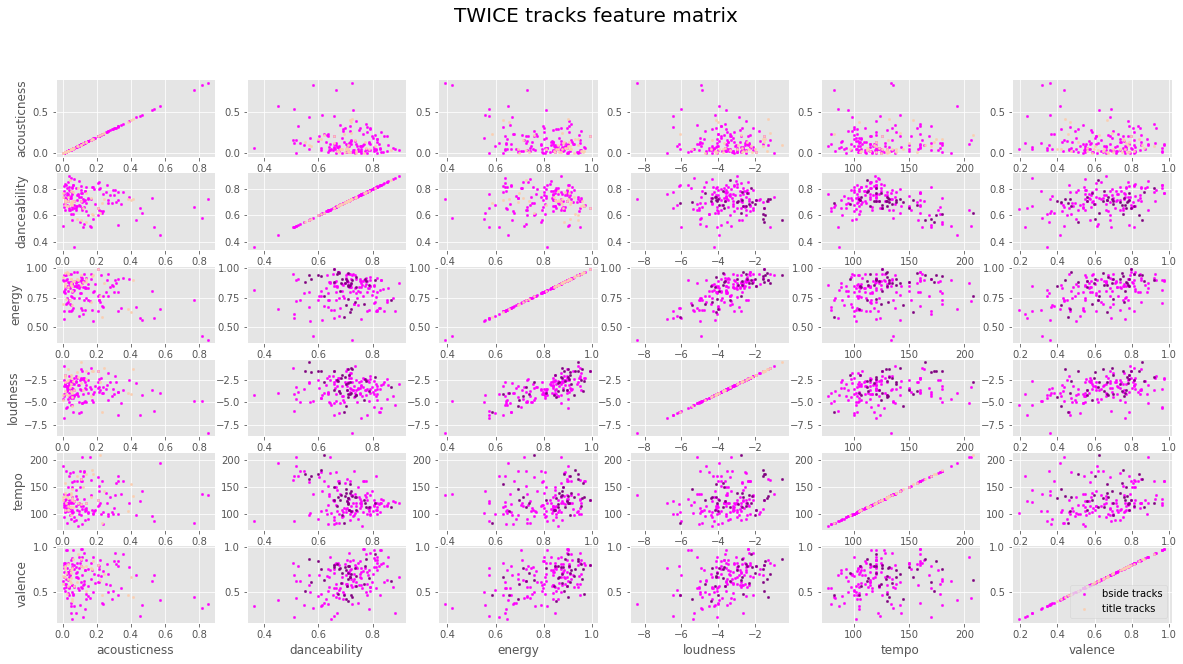

In [78]:
features = ['acousticness', 'danceability', 'energy', 'loudness', 'tempo', 'valence']
plt.rcParams["figure.figsize"] = (20,10)

# ---------- extract individual data for plotting ---------- #
d_acoustic = df_bsides.loc[:,'acousticness']
d_dance = df_bsides.loc[:, 'danceability']
d_energy = df_bsides.loc[:, 'energy']
d_loud = df_bsides.loc[:, 'loudness']
d_tempo = df_bsides.loc[:, 'tempo']
d_valence = df_bsides.loc[:, 'valence']

t_acoustic = df_title.loc[:,'acousticness']
t_dance = df_title.loc[:, 'danceability']
t_energy = df_title.loc[:, 'energy']
t_loud = df_title.loc[:, 'loudness']
t_tempo = df_title.loc[:, 'tempo']
t_valence = df_title.loc[:, 'valence']

# ---------- create data matrix for analysis ---------- ##
fig = plt.figure()
plt.rcParams.update({'font.size': 10})
fig.suptitle('TWICE tracks feature matrix', fontsize=20)

# >>> plot against acousticness
ax1 = fig.add_subplot(6, 6, 1)
ax1.scatter(d_acoustic, d_acoustic, c='#FF00FF', s=5)
ax1.scatter(t_acoustic, t_acoustic, c='#FBCEB1', s=5)
ax1.set_ylabel('acousticness')

ax1 = fig.add_subplot(6, 6, 2)
ax1.scatter(d_dance, d_acoustic, c='#FF00FF', s=5)
ax1.scatter(t_dance, t_acoustic, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 3)
ax1.scatter(d_energy, d_acoustic, c='#FF00FF', s=5)
ax1.scatter(t_energy, t_acoustic, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 4)
ax1.scatter(d_loud, d_acoustic, c='#FF00FF', s=5)
ax1.scatter(t_loud, t_acoustic, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 5)
ax1.scatter(d_tempo, d_acoustic, c='#FF00FF', s=5)
ax1.scatter(t_tempo, t_acoustic, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 6)
ax1.scatter(d_valence, d_acoustic, c='#FF00FF', s=5)
ax1.scatter(t_valence, t_acoustic, c='#FBCEB1', s=5)

# >>> plot against danceability
ax1 = fig.add_subplot(6, 6, 7)
ax1.scatter(d_acoustic, d_dance, c='#FF00FF', s=5)
ax1.scatter(t_acoustic, t_dance, c='#FBCEB1', s=5)
ax1.set_ylabel('danceability')

ax1 = fig.add_subplot(6, 6, 8)
ax1.scatter(d_dance, d_dance, c='#FF00FF', s=5)
ax1.scatter(t_dance, t_dance, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 9)
ax1.scatter(d_energy, d_dance, c='#FF00FF', s=5)
ax1.scatter(t_energy, t_dance, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 10)
ax1.scatter(d_loud, d_dance, c='#FF00FF', s=5)
ax1.scatter(t_loud, t_dance, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 11)
ax1.scatter(d_tempo, d_dance, c='#FF00FF', s=5)
ax1.scatter(t_tempo, t_dance, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 12)
ax1.scatter(d_valence, d_dance, c='#FF00FF', s=5)
ax1.scatter(t_valence, t_dance, c='purple', s=5)

# >>> plot against energy
ax1 = fig.add_subplot(6, 6, 13)
ax1.scatter(d_acoustic, d_energy, c='#FF00FF', s=5)
ax1.scatter(t_acoustic, t_energy, c='#FBCEB1', s=5)
ax1.set_ylabel('energy')

ax1 = fig.add_subplot(6, 6, 14)
ax1.scatter(d_dance, d_energy, c='#FF00FF', s=5)
ax1.scatter(t_dance, t_energy, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 15)
ax1.scatter(d_energy, d_energy, c='#FF00FF', s=5)
ax1.scatter(t_energy, t_energy, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 16)
ax1.scatter(d_loud, d_energy, c='#FF00FF', s=5)
ax1.scatter(t_loud, t_energy, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 17)
ax1.scatter(d_tempo, d_energy, c='#FF00FF', s=5)
ax1.scatter(t_tempo, t_energy, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 18)
ax1.scatter(d_valence, d_energy, c='#FF00FF', s=5)
ax1.scatter(t_valence, t_energy, c='purple', s=5)

# >>> plot against loudness
ax1 = fig.add_subplot(6, 6, 19)
ax1.scatter(d_acoustic, d_loud, c='#FF00FF', s=5)
ax1.scatter(t_acoustic, t_loud, c='#FBCEB1', s=5)
ax1.set_ylabel('loudness')

ax1 = fig.add_subplot(6, 6, 20)
ax1.scatter(d_dance, d_loud, c='#FF00FF', s=5)
ax1.scatter(t_dance, t_loud, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 21)
ax1.scatter(d_energy, d_loud, c='#FF00FF', s=5)
ax1.scatter(t_energy, t_loud, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 22)
ax1.scatter(d_loud, d_loud, c='#FF00FF', s=5)
ax1.scatter(t_loud, t_loud, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 23)
ax1.scatter(d_tempo, d_loud, c='#FF00FF', s=5)
ax1.scatter(t_tempo, t_loud, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 24)
ax1.scatter(d_valence, d_loud, c='#FF00FF', s=5)
ax1.scatter(t_valence, t_loud, c='purple', s=5)

# >>> plot against tempo
ax1 = fig.add_subplot(6, 6, 25)
ax1.scatter(d_acoustic, d_tempo, c='#FF00FF', s=5)
ax1.scatter(t_acoustic, t_tempo, c='#FBCEB1', s=5)
ax1.set_ylabel('tempo')

ax1 = fig.add_subplot(6, 6, 26)
ax1.scatter(d_dance, d_tempo, c='#FF00FF', s=5)
ax1.scatter(t_dance, t_tempo, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 27)
ax1.scatter(d_energy, d_tempo, c='#FF00FF', s=5)
ax1.scatter(t_energy, t_tempo, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 28)
ax1.scatter(d_loud, d_tempo, c='#FF00FF', s=5)
ax1.scatter(t_loud, t_tempo, c='purple', s=5)

ax1 = fig.add_subplot(6, 6, 29)
ax1.scatter(d_tempo, d_tempo, c='#FF00FF', s=5)
ax1.scatter(t_tempo, t_tempo, c='#FBCEB1', s=5)

ax1 = fig.add_subplot(6, 6, 30)
ax1.scatter(d_valence, d_tempo, c='#FF00FF', s=5)
ax1.scatter(t_valence, t_tempo, c='purple', s=5)

# >>> plot against valence
ax1 = fig.add_subplot(6, 6, 31)
ax1.scatter(d_acoustic, d_valence, c='#FF00FF', s=5)
ax1.scatter(t_acoustic, t_valence, c='#FBCEB1', s=5)
ax1.set_ylabel('valence')
ax1.set_xlabel('acousticness')

ax1 = fig.add_subplot(6, 6, 32)
ax1.scatter(d_dance, d_valence, c='#FF00FF', s=5)
ax1.scatter(t_dance, t_valence, c='purple', s=5)
ax1.set_xlabel('danceability')

ax1 = fig.add_subplot(6, 6, 33)
ax1.scatter(d_energy, d_valence, c='#FF00FF', s=5)
ax1.scatter(t_energy, t_valence, c='purple', s=5)
ax1.set_xlabel('energy')

ax1 = fig.add_subplot(6, 6, 34)
ax1.scatter(d_loud, d_valence, c='#FF00FF', s=5)
ax1.scatter(t_loud, t_valence, c='purple', s=5)
ax1.set_xlabel('loudness')

ax1 = fig.add_subplot(6, 6, 35)
ax1.scatter(d_tempo, d_valence, c='#FF00FF', s=5)
ax1.scatter(t_tempo, t_valence, c='purple', s=5)
ax1.set_xlabel('tempo')

ax1 = fig.add_subplot(6, 6, 36)
ax1.scatter(d_valence, d_valence, c='#FF00FF', s=5, label='bside tracks')
ax1.scatter(t_valence, t_valence, c='#FBCEB1', s=5, label='title tracks')
ax1.set_xlabel('valence')

plt.legend(loc='lower right')
plt.show()

TWICE tracks are generally loud and festive. The louder the song, the more energy it has. However, there is no correlation between the tempo, valence, and danceability. The tempo and valence variation does not greatly affect the danceability and energy. Almost all twice tracks are danceable and high energy.

## Conclusion

Looking at their overall discography, listening to all TWICE title tracks will give you a rough idea about their entire discography. It is loud, festive, and positive music.

However, as there's still a hint of variation, one should not assume that all songs falls in the same genre and sound. Their music covers a huge range in terms of tempo, and valence which greatly affects a song's mood and genre.